In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import mglearn

In [15]:
iris_data = load_iris()

In [16]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

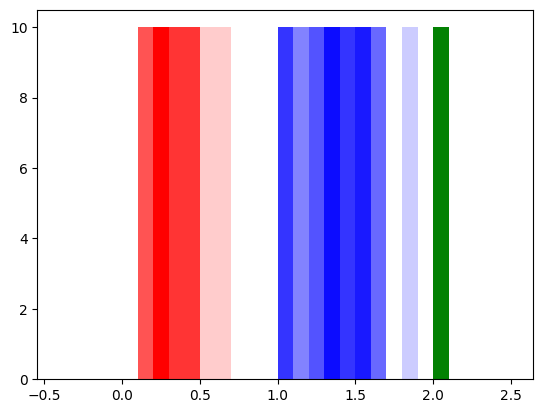

In [23]:
res = []
# add a new column to the data 
res = np.insert(iris_data['data'],4,iris_data['target'],1)
for r in res:
    if r[-1] == 0:
        plt.hist(r[3], label='setosa',color='red', alpha=0.2,density=True)
    if r[-1] == 1: 
        plt.hist(r[3], label='versicolor',color='blue', alpha=0.2, density=True)
    if r[-2] == 2:
        plt.hist(r[3],label='virginica',color='green', alpha=0.5, density=True)
plt.show()

In [24]:
#split data in 2 parts
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_data['data'],iris_data['target'],random_state=0,train_size=0.8)

In [25]:
print(len(x_train))
print(len(x_test))

120
30


array([[<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='p

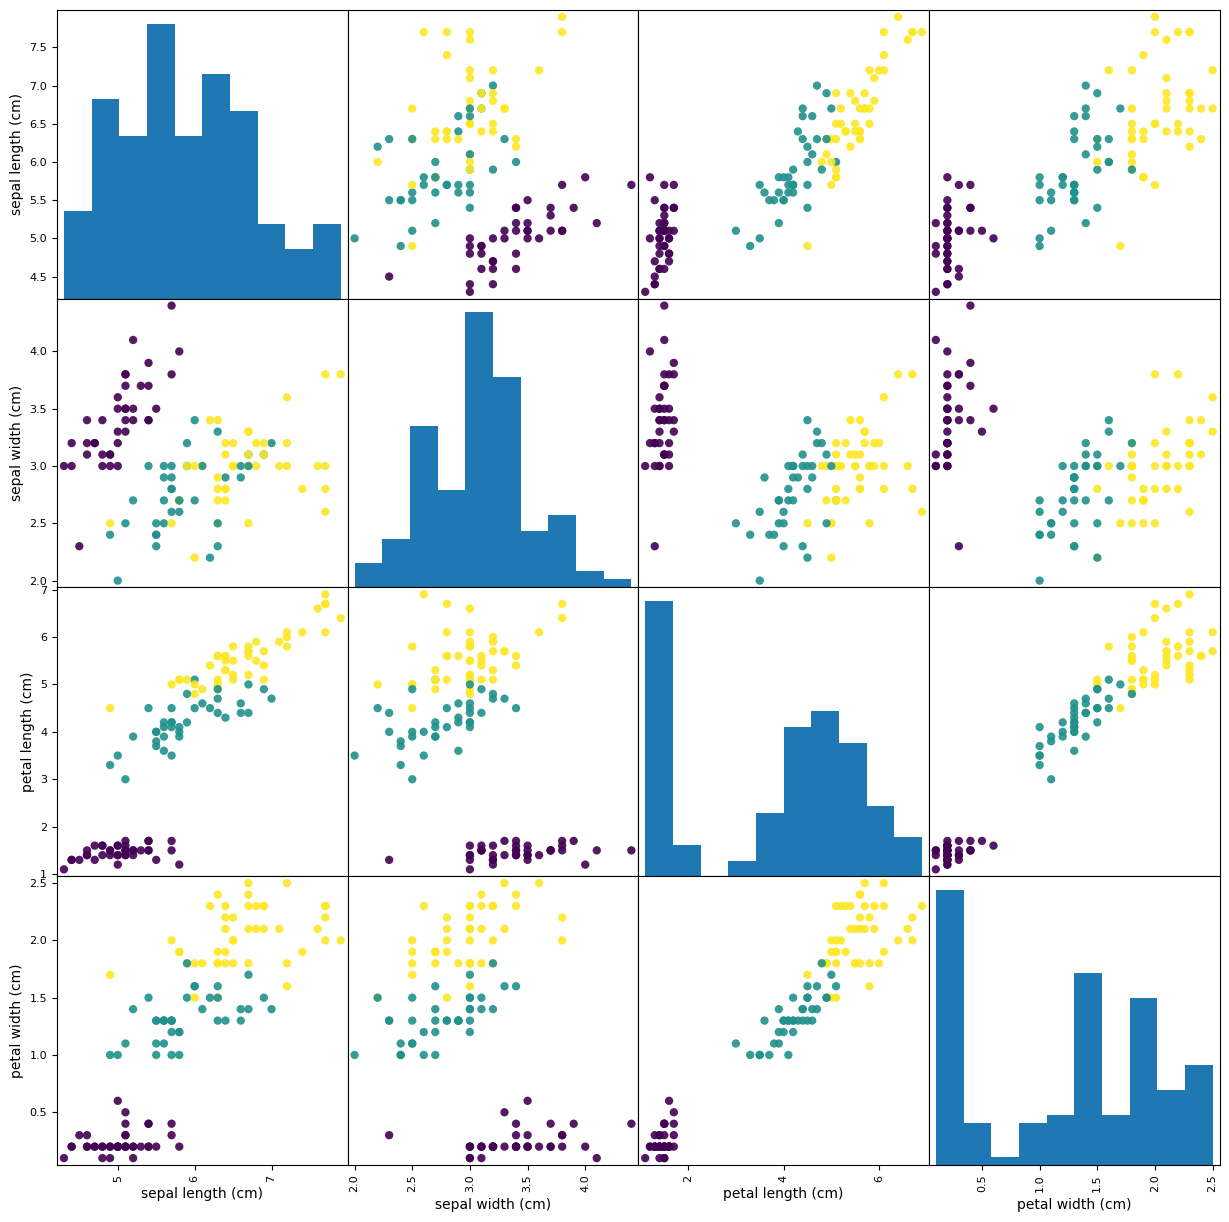

In [26]:
df = pd.DataFrame(x_train,columns=iris_data.feature_names)
pd.plotting.scatter_matrix(df,c=y_train,figsize=(15,15),marker='0',alpha=0.9)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [38]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
predict = knn.predict(x_test)

In [40]:
print("Predict: ",predict)
print("Actual: ",y_test)

Predict:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Actual:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [41]:
accuracy = knn.score(x_test,y_test)
accuracy

0.9666666666666667

/home/nacool/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


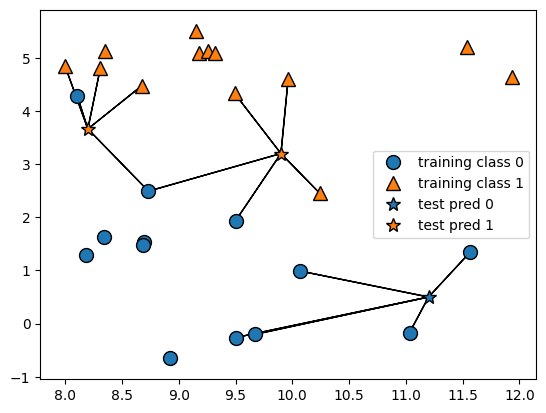

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [44]:
import json
# get the best k for knn
accuracy = {0:0.0}
for n in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=n,p=4)
    knn.fit(x_train,y_train)
    test_accuracy = knn.score(x_test,y_test)
    if test_accuracy :
        accuracy[n] = test_accuracy
print(json.dumps(accuracy,indent=2))

{
  "0": 0.0,
  "1": 1.0,
  "2": 0.9666666666666667,
  "3": 0.9666666666666667,
  "4": 1.0,
  "5": 0.9666666666666667,
  "6": 1.0,
  "7": 1.0,
  "8": 1.0,
  "9": 1.0,
  "10": 1.0,
  "11": 1.0,
  "12": 1.0,
  "13": 1.0,
  "14": 1.0,
  "15": 1.0,
  "16": 1.0,
  "17": 1.0,
  "18": 1.0,
  "19": 1.0,
  "20": 1.0,
  "21": 1.0,
  "22": 1.0,
  "23": 1.0,
  "24": 1.0,
  "25": 1.0,
  "26": 0.9666666666666667,
  "27": 0.9333333333333333,
  "28": 0.9666666666666667,
  "29": 0.9333333333333333,
  "30": 0.9333333333333333,
  "31": 0.9333333333333333,
  "32": 0.9333333333333333,
  "33": 0.9333333333333333,
  "34": 0.9,
  "35": 0.9333333333333333,
  "36": 0.9333333333333333,
  "37": 0.9333333333333333,
  "38": 0.9,
  "39": 0.9,
  "40": 0.9,
  "41": 0.9333333333333333,
  "42": 0.9333333333333333,
  "43": 0.9333333333333333,
  "44": 0.9,
  "45": 0.9,
  "46": 0.9,
  "47": 0.9,
  "48": 0.8666666666666667,
  "49": 0.9,
  "50": 0.9
}


# Materials 

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

**KNN is a lazy learning and non-parametric algorithm.**

It's called a lazy learning algorithm or lazy learner because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.

**The KNN Algorithm**

1. Load the data
2. Initialize K to your chosen number of neighbors

3. For each example in the data

3.1 Calculate the distance between the query example and the current example from the data.

3.2 Add the distance and the index of the example to an ordered collection

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances

5. Pick the first K entries from the sorted collection

6. Get the labels of the selected K entries

7. If regression, return the mean of the K labels

8. If classification, return the mode of the K labels